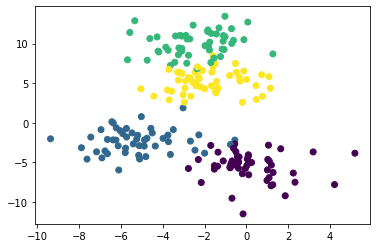

In [34]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, 
                  random_state=50) #cluster_std: do lech chuan
points = data[0]
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')


In [13]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=4)
#Training instances to cluster
kms.fit(points) 
#Compute cluster centers and predict cluster index for each sample
y_km = kms.fit_predict(points) 
y_km

array([1, 0, 3, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 3, 2, 3, 1, 1, 2, 2, 2, 3,
       1, 1, 1, 3, 1, 0, 3, 1, 1, 2, 2, 0, 0, 2, 2, 2, 3, 3, 1, 2, 3, 3,
       0, 0, 1, 3, 3, 1, 0, 2, 3, 1, 3, 3, 0, 2, 2, 3, 0, 0, 1, 0, 0, 1,
       0, 3, 1, 1, 0, 2, 1, 0, 3, 3, 2, 3, 3, 0, 2, 3, 2, 2, 2, 2, 1, 0,
       1, 2, 0, 1, 0, 3, 3, 2, 0, 3, 0, 3, 2, 0, 3, 1, 3, 0, 3, 0, 2, 1,
       0, 2, 1, 1, 2, 3, 1, 1, 3, 0, 1, 3, 1, 1, 0, 1, 1, 3, 3, 0, 2, 0,
       0, 3, 1, 3, 0, 1, 1, 2, 1, 3, 3, 0, 2, 1, 0, 3, 0, 2, 1, 2, 3, 0,
       0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 2, 3, 0, 3,
       2, 0, 1, 3, 0, 3, 3, 1, 2, 0, 2, 1, 3, 0, 3, 3, 2, 3, 0, 1, 2, 3,
       2, 1])

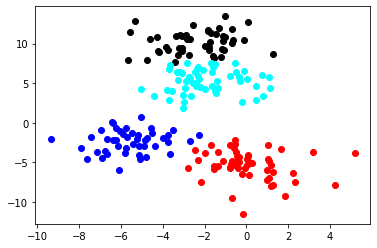

In [23]:
plt.scatter(points[y_km==0,0], points[y_km==0,1], c="red")
plt.scatter(points[y_km==1, 0], points[y_km==1, 1], c="black")
plt.scatter(points[y_km==2, 0], points[y_km==2, 1], c="blue")
plt.scatter(points[y_km==3, 0], points[y_km==3, 1], c="cyan")

array([3, 0, 1, 1, 2, 0, 3, 0, 0, 2, 2, 3, 0, 1, 2, 1, 3, 3, 2, 2, 2, 1,
       3, 3, 3, 1, 3, 0, 1, 3, 3, 2, 2, 0, 0, 2, 2, 2, 1, 1, 3, 2, 1, 1,
       0, 0, 3, 1, 1, 3, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 3, 0, 0, 3,
       0, 1, 3, 3, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 3, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 3, 1, 0, 1, 0, 2, 3,
       0, 2, 3, 3, 2, 1, 3, 3, 1, 0, 1, 1, 1, 3, 0, 3, 3, 1, 1, 0, 2, 0,
       0, 1, 3, 1, 0, 3, 3, 2, 3, 1, 1, 0, 2, 3, 0, 1, 0, 2, 3, 2, 1, 0,
       0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 3, 1, 0, 1, 1, 3, 2, 0, 2, 3, 1, 0, 1, 1, 2, 1, 0, 3, 2, 1,
       2, 3], dtype=int64)

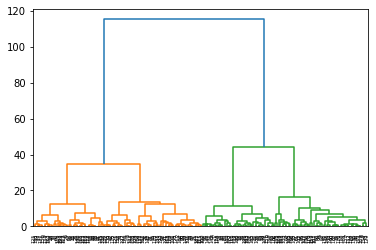

In [41]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', 
                             linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)
y_hc

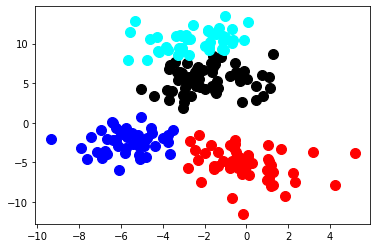

In [30]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')

In [1]:
import numpy

def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           # Get the next cluster label.
           C += 1
           
           # Assing the label to our seed point.
           labels[P] = C
           
           # Grow the cluster from the seed point.
           growCluster(D, labels, P, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # SearchQueue is a FIFO queue of points to evaluate. It will only ever 
    # contain points which belong to cluster C (and have already been labeled
    # as such).
    #
    # The points are represented by their index values (not the actual vector).
    #
    # The FIFO queue behavior is accomplished by appending new points to the
    # end of the list, and using a while-loop rather than a for-loop.
    SearchQueue = [P]

    # For each point in the queue:
    #   1. Determine whether it is a branch or a leaf
    #   2. For branch points, add their unclaimed neighbors to the search queue
    i = 0
    while i < len(SearchQueue):    
        
        # Get the next point from the queue.        
        P = SearchQueue[i]

        # Find all the neighbors of P
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number of neighbors is below the minimum, then this is a leaf
        # point and we move to the next point in the queue.
        if len(NeighborPts) < MinPts:
            i += 1
            continue
        
        # Otherwise, we have the minimum number of neighbors, and this is a 
        # branch point.
            
        # For each of the neighbors...
        for Pn in NeighborPts:
           
            # If Pn was labelled NOISE during the seed search, then we
            # know it's not a branch point (it doesn't have enough 
            # neighbors), so make it a leaf point of cluster C and move on.
            if labels[Pn] == -1:
               labels[Pn] = C
            # Otherwise, if Pn isn't already claimed, claim it as part of
            # C and add it to the search queue.   
            elif labels[Pn] == 0:
                # Add Pn to cluster C.
                labels[Pn] = C
                
                # Add Pn to the SearchQueue.
                SearchQueue.append(Pn)
            
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors